In [1]:
# Auto Gradient Descent for XOR & Linear Regression

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random as rd

In [3]:
# 함수 형태 정리 <나올만한 시험 요약>

#1번 Gradient 구하는 함수
#-----------------------
with tf.GradientTape(persistent=True) as tape: # persistent=True는 안에 있는 미분 값을 계속 기억하겠다는 뜻
    tf.watch()  
    pass
X,Y = 0
grad = tape.gradient(Y,X)

del tape # persistent=True 이므로, 기록을 지우고 싶을때 del tape를 사용한다.

# 여기서 x0을 제외한 나머지는 tf.GradientTape() as tape: 로 구할 수 없다. 
# 오로지, tf.Variable로 만들어진 변수만 적용할 수 있으며, 외부에서 더해지거나 constant값은 처리가 되지 않는다
# 하지만 tf.watch(x1), tf.watch(x2), tf.watch(x3)와 같은 함수를 사용한다면 trainable 할 수 있도록 바꾸어진다.
x0 = tf.Variable(3.0, name = 'x0')
x1 = tf.Variable(3.0, name = 'x1', trainable= False)
x2 = tf.Variable(2.0, name = 'x2') + 1.0
x3 = tf.constant(3.0, name = 'x3')

[var.name for var in tape.watched_variables()] # 현재 tape 상에서 training 가능한 변수를 보여준다.

#만약에 아래의 형태 (watched_accessed_variables=False)라면, tape.watch() 함수를 쓰지 않는 변수는 tape.gradient에서 NONE값을 가진다.
with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x0)
    pass

print(tape.gradient(z, x ,unconnected_gradients = tf.UnconnectedGradients.ZERO))
#NONE을 출력하는게 아니라 0을 출력하고 싶을때에
#unconnected_gradients = tf.UnconnectedGradients.ZERO // tf.뒤에는 대부분 대문자니까 그걸 기억하기
#tf.GradientTape, tf.UnconnectedGradients.ZERO 등
#tf.reduce.zero, tf.nn.sigmoid 이런건 제외


#2번 차원 감소시켜서 평균 구하는 함수, Loss에 적용해서 풀면 됨
#-----------------------
tf.reduce_mean() # 예시, tf.reduce_mean(y**2)등

#3번 텐서플로우 입력층 형태
#-----------------------
layer = tf.keras.layers.Dense(2, activation= 'relu') # tf.keras.layers.Dense <- 손코딩해야하니까 외우기



In [4]:
# Tensorflow를 통해 GD를 구하자
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x ** 2
grad = tape.gradient(y,x) # y를 x에 대해 미분하고, x값인 3.0을 대입한 값 = dy_dx
print(grad) # tf.Tensor 변수로 호출된다.
print("--")
print(grad.numpy()) # numpy 변수로 바꿔서 호출

tf.Tensor(6.0, shape=(), dtype=float32)
--
6.0


In [10]:
# Tensorflow 
w = tf.Variable(tf.random.normal((3,2)), name = 'w')
b = tf.Variable(tf.zeros(2,dtype=tf.float32), name = 'b')
x = [[1.,2.,3.]] # 1., 2., 3. 에서 .는 1.0을 뜻하는데 0을 안써도됨 즉 float 형태로 데이터 만들어주려고 . 붙이는거임
print(w)
print(b)
print(x)

print("----------------\n")

with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y**2)
    
print(y)

[dL_dw , dL_db] = tape.gradient(loss, [w,b])
print("----------------OUTPUT----------------\n")
print(dL_dw)
print(dL_db)
print("\n")

# 딕셔너리 형태로 gradient 출력하기 
my_vars = {'w' : w, 'b' : b}
grad = tape.gradient(loss, my_vars)
print(grad)

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.6620005 ,  0.73303896],
       [ 0.24486488, -0.99127585],
       [ 0.29538158, -0.7529332 ]], dtype=float32)>
<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>
[[1.0, 2.0, 3.0]]
----------------

tf.Tensor([[ 2.0378752 -3.5083122]], shape=(1, 2), dtype=float32)
----------------OUTPUT----------------

tf.Tensor(
[[  2.0378752  -3.5083122]
 [  4.0757504  -7.0166245]
 [  6.1136255 -10.524937 ]], shape=(3, 2), dtype=float32)
tf.Tensor([ 2.0378752 -3.5083122], shape=(2,), dtype=float32)


{'w': <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[  2.0378752,  -3.5083122],
       [  4.0757504,  -7.0166245],
       [  6.1136255, -10.524937 ]], dtype=float32)>, 'b': <tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 2.0378752, -3.5083122], dtype=float32)>}


In [14]:
# tf.keras.layers.Dense
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1.,2.,3.]]) # 중요한게, [[]] 이라는거

with tf.GradientTape() as tape:
    # 순전파
    y = layer(x) # y는 layer에 x넣은 output
    loss = tf.reduce_mean(y**2) # 이 형태를 기억하자. 이것만 계속 주구장창 나온다.
    
grad = tape.gradient(loss,layer.trainable_variables) # layer.trainable_variables는 weight, bias니까 자동으로 잡아준다.
print(grad)

print("--------------\n")

for var, g in zip(layer.trainable_variables, grad):
    print(f'{var.name},shape:{g.shape}')


[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>]
--------------

dense_3/kernel:0,shape:(3, 2)
dense_3/bias:0,shape:(2,)


In [15]:
# A trainable variable
x0 = tf.Variable(3.0, name='x0')
# Not trainable
x1 = tf.Variable(3.0, name='x1', trainable=False)
# Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name='x2') + 1.0
# Not a variable
x3 = tf.constant(3.0, name='x3')

with tf.GradientTape() as tape:
  y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
  print(g)
  
[var.name for var in tape.watched_variables()] # tape.watched_variables 기억하기

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


['x0:0']

In [5]:
x = tf.linspace(-10.0, 10.0, 200+1) # -10부터 10까지, 201개의 index

with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(x)
    
    
dy_dx = tape.gradient(y,x)

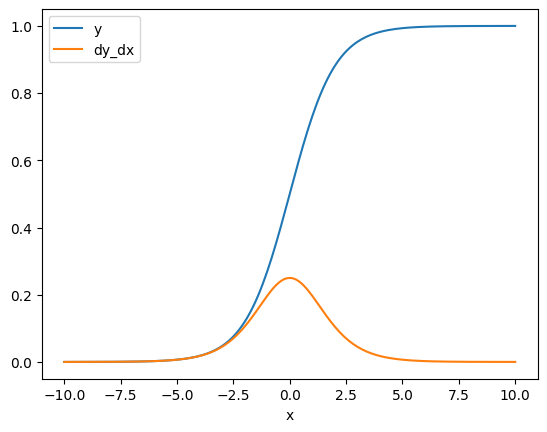

In [6]:
plt.plot(x,y,label = 'y')

plt.plot(x,dy_dx,label = 'dy_dx')
plt.legend()
_= plt.xlabel('x')

In [11]:
x = tf.Variable(2.0)

for epoch in range(2):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = x + 1
    print(type(x).__name__, ":", tape.gradient(y,x))
    x = x + 1
    

ResourceVariable : tf.Tensor(1.0, shape=(), dtype=float32)
EagerTensor : tf.Tensor(1.0, shape=(), dtype=float32)


In [27]:
x = tf.Variable([[1.0, 2.0],
                 [3.0, 4.0]], dtype=tf.float32)

with tf.GradientTape() as tape:
  x2 = x**2
  print(x2)
  # This step is calculated with NumPy
  #y = np.mean(x2, axis=0)
  #print(y)
  # Like most ops, reduce_mean will cast the NumPy array to a constant tensor
  # using `tf.convert_to_tensor`.
  #y = tf.reduce_mean(y, axis=0)
  y = x2
  print(y)

print(tape.gradient(y, x))



tf.Tensor(
[[ 1.  4.]
 [ 9. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.  4.]
 [ 9. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 4.]
 [6. 8.]], shape=(2, 2), dtype=float32)


In [37]:
image = tf.Variable([[[0.5, 0.0, 0.0]]]) # 얘는 왜 3개노
delta = tf.Variable(0.1)

with tf.GradientTape() as tape:
  new_image = tf.image.adjust_contrast(image, delta)

try: # try는 또 뭐노
  print(tape.gradient(new_image, [image, delta]))
  assert False   # assert는 또 뭐고
except LookupError as e: # 얘는 또 뭐고
  print(f'{type(e).__name__}: {e}') # 잣됬네


LookupError: gradient registry has no entry for: AdjustContrastv2


In [44]:
x = tf.Variable([2., 2.])
y = tf.Variable(3.)

with tf.GradientTape(persistent = True) as tape:
  z = y**2
print(tape.gradient(z, x))
print(tape.gradient(z, x ,unconnected_gradients = tf.UnconnectedGradients.ZERO))

None
tf.Tensor([0. 0.], shape=(2,), dtype=float32)


In [ ]:
# tf 자동미분을 활용해 선형회귀 문제를 풀어보자 (5월 6일 코드)

n = 20

x = [[float(i) for i in range(n)]] # 자동미분할때 [] 2개 쓰기
y = [[i + np.random.rand()*7 for i in range(n)]]
w = tf.Variable(tf.random.normal((1,1)), name = 'w')
b = tf.Variable(tf.random.normal((1,1)), name = 'b')

iter = 0
maxIter = 20
lr = tf.constant(0.0005)
Loss = []

while True:
    loss_ = 0.0
    
    for k in range(np.size(x, 1)):
        X = [[x[0][k]]]
        Y = [[y[0][k]]]
        print(X)
    
        with tf.GradientTape() as tape:
            f = X*w+b
            print("f",f)
            loss = tf.reduce_mean((f-Y)**2)
        
        [dl_dw, dl_db] = tape.gradient(loss,[w,b])
        #[dl_dw, dl_db] = tape.gradient(loss, trainable_variables) # 얘는 layer가 있을때만
        print("dl_dw:", dl_dw)
        print("dl_dw:", dl_db)
        print(type(dl_dw))
        print(type(lr))
        loss_ = loss_ + loss
        
        w.assign_add(-lr*dl_dw)
        b.assign_add(-lr*dl_db)
        print(w)
        print(b) 
    iter+=1
    Loss.append(loss_.numpy())
    
    w_ = w.numpy()
    b_ = b.numpy()
    
    print(w_[0][0])
    print(b_[0][0])
    y_regress = [w_[0][0]*i + b_[0][0] for i in x[0]]
    print(y_regress)
        
    if iter>maxIter:break
plt.plot(range(iter),Loss,'b')
plt.show()

plt.plot(x[0],y_regress,'r')
plt.scatter(x,y,color ='blue')
plt.show()

[[0.0]]
f tf.Tensor([[0.4472389]], shape=(1, 1), dtype=float32)
dl_dw: tf.Tensor([[-0.]], shape=(1, 1), dtype=float32)
dl_dw: tf.Tensor([[-2.3850777]], shape=(1, 1), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<tf.Variable 'w:0' shape=(1, 1) dtype=float32, numpy=array([[0.9130584]], dtype=float32)>
<tf.Variable 'b:0' shape=(1, 1) dtype=float32, numpy=array([[0.44843143]], dtype=float32)>
[[1.0]]
f tf.Tensor([[1.3614898]], shape=(1, 1), dtype=float32)
dl_dw: tf.Tensor([[-7.9452877]], shape=(1, 1), dtype=float32)
dl_dw: tf.Tensor([[-7.9452877]], shape=(1, 1), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<tf.Variable 'w:0' shape=(1, 1) dtype=float32, numpy=array([[0.91703105]], dtype=float32)>
<tf.Variable 'b:0' shape=(1, 1) dtype=float32, numpy=array([[0.45240408]], dtype=float32)>
[[2.0]]
f tf.Tensor([[2.2864661]], shape=(1, 1), dty

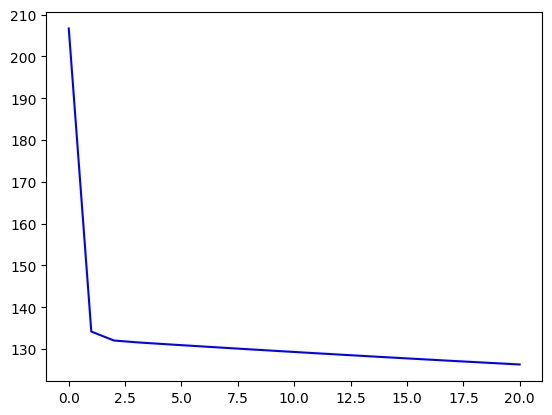

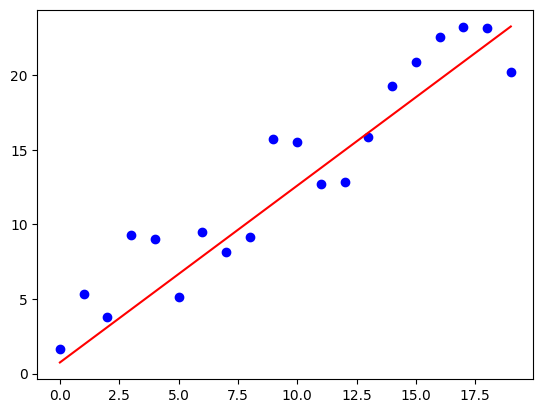

In [77]:
# tf 자동미분을 활용해 선형회귀 문제를 풀어보자 (5월 6일 코드)

n = 20

x = [[float(i) for i in range(n)]] # 자동미분할때 [] 2개 쓰기
y = [[i + np.random.rand()*7 for i in range(n)]]
w = tf.Variable(tf.random.normal((1,1)), name = 'w')
b = tf.Variable(tf.random.normal((1,1)), name = 'b')

iter = 0
maxIter = 20
lr = tf.constant(0.0005)
Loss = []

while True:
    loss_ = 0.0
    
    for k in range(np.size(x, 1)):
        X = [[x[0][k]]]
        Y = [[y[0][k]]]
        print(X)
    
        with tf.GradientTape() as tape:
            f = X*w+b
            print("f",f)
            loss = tf.reduce_mean((f-Y)**2)
        
        [dl_dw, dl_db] = tape.gradient(loss,[w,b])
        #[dl_dw, dl_db] = tape.gradient(loss, trainable_variables) # 얘는 layer가 있을때만
        print("dl_dw:", dl_dw)
        print("dl_dw:", dl_db)
        print(type(dl_dw))
        print(type(lr))
        loss_ = loss_ + loss
        
        w.assign_add(-lr*dl_dw)
        b.assign_add(-lr*dl_db)
        print(w)
        print(b) 
    iter+=1
    Loss.append(loss_.numpy())
    
    w_ = w.numpy()
    b_ = b.numpy()
    
    print(w_[0][0])
    print(b_[0][0])
    y_regress = [w_[0][0]*i + b_[0][0] for i in x[0]]
    print(y_regress)
        
    if iter>maxIter:break
plt.plot(range(iter),Loss,'b')
plt.show()

plt.plot(x[0],y_regress,'r')
plt.scatter(x,y,color ='blue')
plt.show()

In [83]:
#라이브러리 암기하기 손코딩이라 쒯
from sklearn import datasets
from tensorflow.keras.utils import to_categorical # One-hot encoding
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation


(4, 2)
1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
[[1 0]
 [0 1]
 [0 0]
 [1 1]] [[1]
 [1]
 [0]
 [0]]
Epoch 1/3000
4/4 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000 
Epoch 2/3000
4/4 [==============================] - 0s 666us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/3000
4/4 [==============================] - 0s 836us/step 

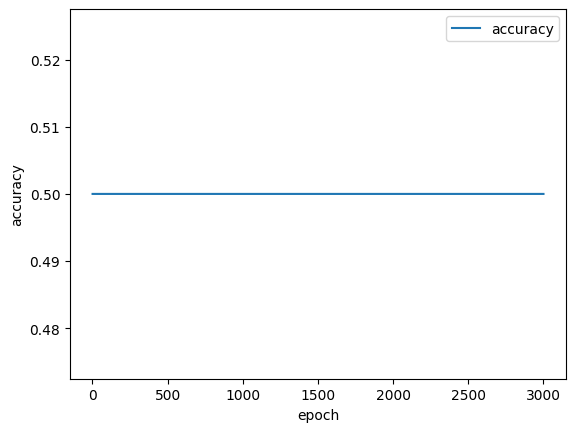

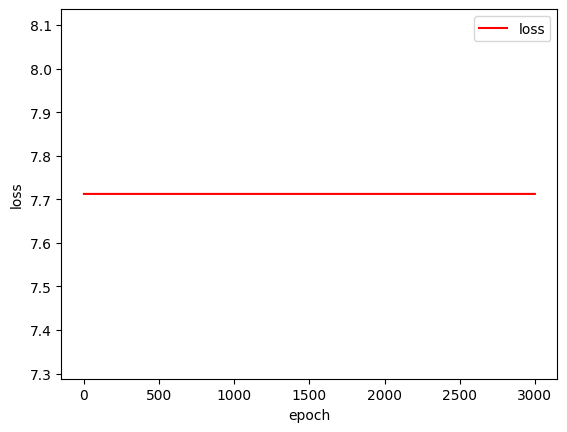

In [89]:
from sklearn import datasets
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

import matplotlib.pyplot as plt

# 랜덤 시드 설정
np.random.seed(1)
#tf.random.set_seed(1)

# 데이터 불러오기
#raw_wine = datasets.load_wine()

# 피쳐, 타겟 데이터 지정
#X = raw_wine.data
#y = raw_wine.target

#X_tn = np.array([[1, 0, 1], [0, 1, 1], [0, 0, 1], [1, 1, 1]])

X_tn = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])

y_tn = np.array([[1], [1], [0], [0]])

# 피쳐 데이터 차원 확인
print(X_tn.shape)

# 타겟 데이터 종류 확인
#print(set(y))

# 타겟 데이터 원-핫 인코딩
#y_tn = to_categorical(y_tn) 
#print(y_tn)
# 트레이닝/테스트 데이터 분할
#X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot, random_state=0)

# 신경망 생성
n_feat = X_tn.shape[1]
#print(n_feat)
#n_class = len(set(y_tn))
n_class = y_tn.shape[1]
print(n_class)

epo = 3000

model = Sequential()
model.add(Dense(10, input_dim=n_feat))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
model.add(Activation('sigmoid'))
model.add(Dense(n_class))
#model.add(Activation('sigmoid'))
#model.add(Activation('softmax'))
#model.add(Activation('linear'))

##########################
#model = Sequential()
#model.add(Dense(8, input_dim=2))
#model.add(Activation('tanh'))
#model.add(Dense(1))
#model.add(Activation('sigmoid'))
##########################



# 신경망 모형 구조 확인
model.summary()

# 모형 컴파일
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(X_tn,y_tn)
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=1)

# 트레이닝 데이터 평가
#print(model.evaluate(X_tn, y_tn)[1])

print(model.predict(X_tn))


epoch = np.arange(1,epo+1)
accuracy = hist.history['accuracy'] 
loss = hist.history['loss'] 

# 정확도 학습 그래프
plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(epoch, loss,'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()